In [39]:
# logistic Regression

In [40]:
# logistic regression is used to catagorical data and linear regression used for contineue number

In [41]:
# sigmoid function use for prect probability between 0 to 1

In [42]:
# ex- loan approval prediction

In [43]:
import joblib
df=joblib.load('../learning_notebooks/02_Outliers_Scaling_And_Feature_Selection.ipynb')


In [44]:
df.head()

,Gender,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,TotalIncome,LoanIncomeRatio,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,IncomeGroup_medium,IncomeGroup_high,IncomeGroup_veryhigh
0,1,5849,0,146.0,360,1,5849,0,0,0,0,0,0,0,1,0,0,1
1,1,4583,1508,128.0,360,1,6091,0,1,1,0,0,0,0,0,0,0,1
2,1,3000,0,66.0,360,1,3000,0,1,0,0,0,0,1,1,1,0,0
3,1,2583,2358,120.0,360,1,4941,0,1,0,0,0,1,0,1,0,1,0
4,1,6000,0,141.0,360,1,6000,0,0,0,0,0,0,0,1,0,0,1


In [45]:
# Model build logistic regression

In [46]:
# prepare data 
X=df.drop('Loan_Status_Y',axis=1)
y=df['Loan_Status_Y']

In [47]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
# apply scalling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
X_train_scaled=scaler.fit_transform(X_train)     # fit only train data not test data to avoid leakege
X_test_scaled=scaler.transform(X_test)

In [49]:
# build logistic regression model 
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
# prediction
y_pred=lr_model.predict(X_test_scaled)
y_prob=lr_model.predict_proba(X_test_scaled)[:,1]

In [51]:
# model coefficient
lr_model.coef_

array([[-0.15059621, -0.03827237, -0.20628504, -0.43804607,  0.02627974,
         1.16355757, -0.13774368,  0.        ,  0.34027162, -0.13240216,
         0.11725259,  0.1198818 , -0.14070339, -0.04452586, -0.4668355 ,
        -0.48801532, -0.14456573]])

In [52]:
lr_model.intercept_

array([0.95846814])

In [53]:
# confussion matrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[19, 24],
       [ 2, 78]])

In [54]:
# precesion,recall,f1_score 
# classification report
from sklearn.metrics import classification_report
print("\nclassification_report : \n",classification_report(y_test,y_pred))


classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



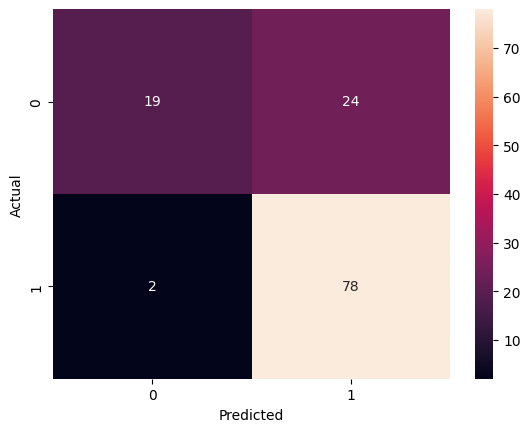

In [55]:
# visual confussion matrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
# roc auc curve 
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,y_pred)
auc

0.7084302325581395

In [57]:
# roc curve 
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

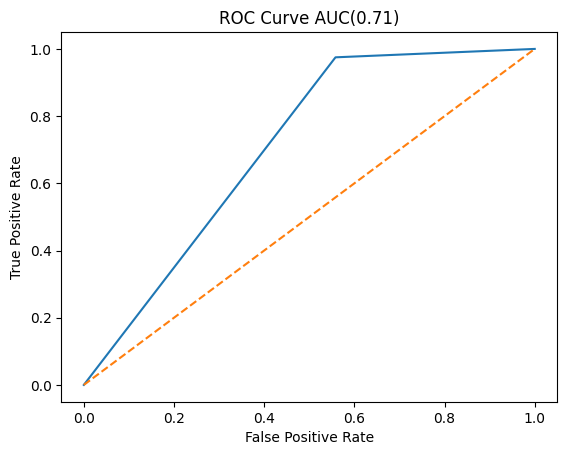

In [58]:
# plot roc curve 
import matplotlib.pyplot as plt 
plt.plot(fpr,tpr) 
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve AUC({auc:.2f})')
plt.show()

In [59]:
# threshold tunining 
# custemer threshold 0.4
custom_threshold=0.4
y_custom_pred=(y_prob>=custom_threshold).astype(int)

In [60]:
# After threshold chnge(0.4) classification report 
from sklearn.metrics import classification_report
print("\nclassification_report : \n",classification_report(y_test,y_custom_pred))


classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



In [61]:
# ccustom_threshold = 0.6
import numpy as np 
custom_threshold=0.6
y_custom_pred=(y_prob>=custom_threshold).astype(int)

In [62]:
# after custom threshold change(0.6) classification_report
from sklearn.metrics import classification_report
print("\nclassification_report : \n",classification_report(y_test,y_custom_pred))


classification_report : 
               precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123



In [63]:
df

,Gender,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,TotalIncome,LoanIncomeRatio,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,IncomeGroup_medium,IncomeGroup_high,IncomeGroup_veryhigh
0,1,5849,0,146.0,360,1,5849,0,0,0,0,0,0,0,1,0,0,1
1,1,4583,1508,128.0,360,1,6091,0,1,1,0,0,0,0,0,0,0,1
2,1,3000,0,66.0,360,1,3000,0,1,0,0,0,0,1,1,1,0,0
3,1,2583,2358,120.0,360,1,4941,0,1,0,0,0,1,0,1,0,1,0
4,1,6000,0,141.0,360,1,6000,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0,71.0,360,1,2900,0,0,0,0,0,0,0,1,1,0,0
610,1,4106,0,40.0,180,1,4106,0,1,0,0,1,0,0,1,0,1,0
611,1,8072,240,253.0,360,1,8312,0,1,1,0,0,0,0,1,0,0,1
612,1,7583,0,187.0,360,1,7583,0,1,0,1,0,0,0,1,0,0,1


In [65]:
import joblib
joblib.dump(df,'../learning_notebooks/03_Model_Building_Logistic_Regression.ipynb')

['../learning_notebooks/03_Model_Building_Logistic_Regression.ipynb']